In [1]:
pip --version

pip 23.2.1 from C:\ProgramData\anaconda3\Lib\site-packages\pip (python 3.11)

Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install tensorflow

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [3]:
import tensorflow as tf

In [4]:
tf.__version__

'2.15.0'

In [5]:
print(tf.__version__)

2.15.0


In [26]:
import tensorflow as tf
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.utils import image_dataset_from_directory
import matplotlib.pyplot as plt

In [7]:
img_size = (160, 160)
batch_size = 30

In [8]:
train_directory = "train"
val_directory = "val"
test_directory = "test"

In [9]:
train_dataset = image_dataset_from_directory(
    train_directory,
    image_size=img_size,
    batch_size=batch_size,
    shuffle=True,
    seed=42,
    label_mode="binary"
)

Found 5216 files belonging to 2 classes.


In [10]:
val_dataset = image_dataset_from_directory(
    val_directory,
    image_size=img_size,
    batch_size=batch_size,
    label_mode="binary"
)

Found 16 files belonging to 2 classes.


In [11]:
test_dataset = image_dataset_from_directory(
    test_directory,
    image_size=img_size,
    batch_size=batch_size,
    label_mode="binary"
)

Found 624 files belonging to 2 classes.


In [12]:
model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape=(160, 160, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))

In [13]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [14]:
epochs = 15
history = model.fit(
    train_dataset,
    epochs=epochs,
    validation_data=val_dataset,
)

Epoch 1/15


174/174 [==============================] - 66s 360ms/step - loss: 1.9594 - accuracy: 0.8694 - val_loss: 0.4476 - val_accuracy: 0.8125
Epoch 2/15
174/174 [==============================] - 59s 334ms/step - loss: 0.1540 - accuracy: 0.9410 - val_loss: 0.4147 - val_accuracy: 0.8750
Epoch 3/15
174/174 [==============================] - 60s 340ms/step - loss: 0.1313 - accuracy: 0.9519 - val_loss: 0.1371 - val_accuracy: 0.9375
Epoch 4/15
174/174 [==============================] - 59s 334ms/step - loss: 0.1003 - accuracy: 0.9626 - val_loss: 0.0848 - val_accuracy: 1.0000
Epoch 5/15
174/174 [==============================] - 60s 339ms/step - loss: 0.0937 - accuracy: 0.9651 - val_loss: 0.7554 - val_accuracy: 0.8125
Epoch 6/15
174/174 [==============================] - 59s 335ms/step - loss: 0.0885 - accuracy: 0.9678 - val_loss: 0.5486 - val_accuracy: 0.8750
Epoch 7/15
174/174 [==============================] - 60s 340ms/step - loss: 0.0706 - accuracy: 0.9751 - val_loss: 0.4664 - val_

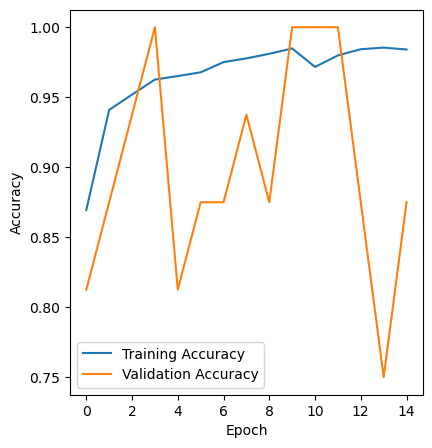

In [18]:
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

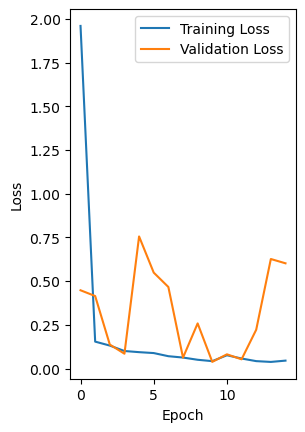

In [19]:
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [21]:
eval_result = model.evaluate(test_dataset)
print("Test Accuracy:", eval_result[1])

21/21 [==============================] - 2s 74ms/step - loss: 2.7724 - accuracy: 0.7388
Test Accuracy: 0.7387820482254028


1/1 [==============================] - 0s 99ms/step
[0.12023271]
Normal


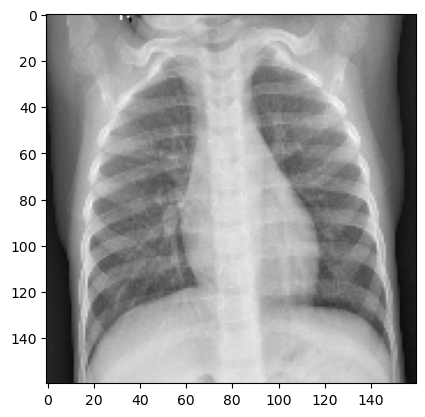

In [24]:
test_image = tf.keras.utils.load_img(
    'test/NORMAL/IM-0093-0001.jpeg',
    target_size=(160, 160))

plt.imshow(test_image)
 
test_image = tf.keras.utils.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis=0)
 
result = model.predict(test_image)
 
class_probabilities = result[0]
 
# Determine the class with the highest probability and print its label
print(class_probabilities)
if class_probabilities[0] <= 0.5:
    print("Normal")
else:
    print("Pneumonia")

1/1 [==============================] - 0s 20ms/step
[0.99999774]
Pneumonia


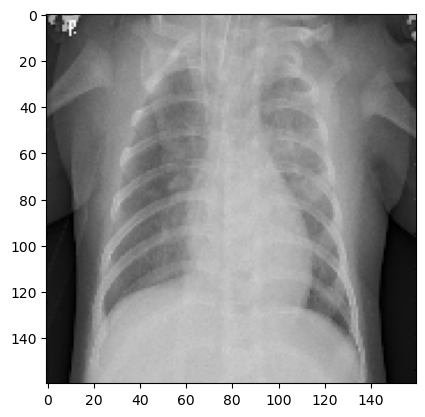

In [25]:
test_image = tf.keras.utils.load_img(
    'test/PNEUMONIA/person114_bacteria_544.jpeg',
    target_size=(160, 160))

plt.imshow(test_image)
 
test_image = tf.keras.utils.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis=0)
 
result = model.predict(test_image)
 
class_probabilities = result[0]
 
# Determine the class with the highest probability and print its label
print(class_probabilities)
if class_probabilities[0] <= 0.5:
    print("Normal")
else:
    print("Pneumonia")